<a href="https://colab.research.google.com/github/manassanant132/Fundamental-of-Deep-Learning/blob/main/Unit10_%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%81%E0%B9%83%E0%B8%8A%E0%B9%89_Loss_Function_%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%9E%E0%B8%B1%E0%B8%92%E0%B8%99%E0%B8%B2_Deep_Learning_Model_(%E0%B8%95%E0%B8%AD%E0%B8%99%E0%B8%97%E0%B8%B5%E0%B9%88_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Model ที่ถูก Train ด้วย Stochastic Gradient Descent Optimization Algorithm มีกระบวนการทำงานหลักๆ 2 ส่วน ได้แก่ 1) Forward Propagation และ 2) Back-propagation โดยในการทำ Forward Propagation จะมีการประมาณ Error หรือ Loss ของ Model ด้วย Loss Function และในการทำ Back-propagation จะมีการปรับค่า Parameter (Weight และ Bias) จากการหาอนุพันธ์ของ Loss Function เพื่อให้ได้ค่า Loss ที่ลดลง โดยเป้าหมายหลักของ Optimization Algorithm คือ การทำให้ Loss เคลื่อนที่ไปยังจุดต่ำสุดบน Loss Surface (Global Minima)

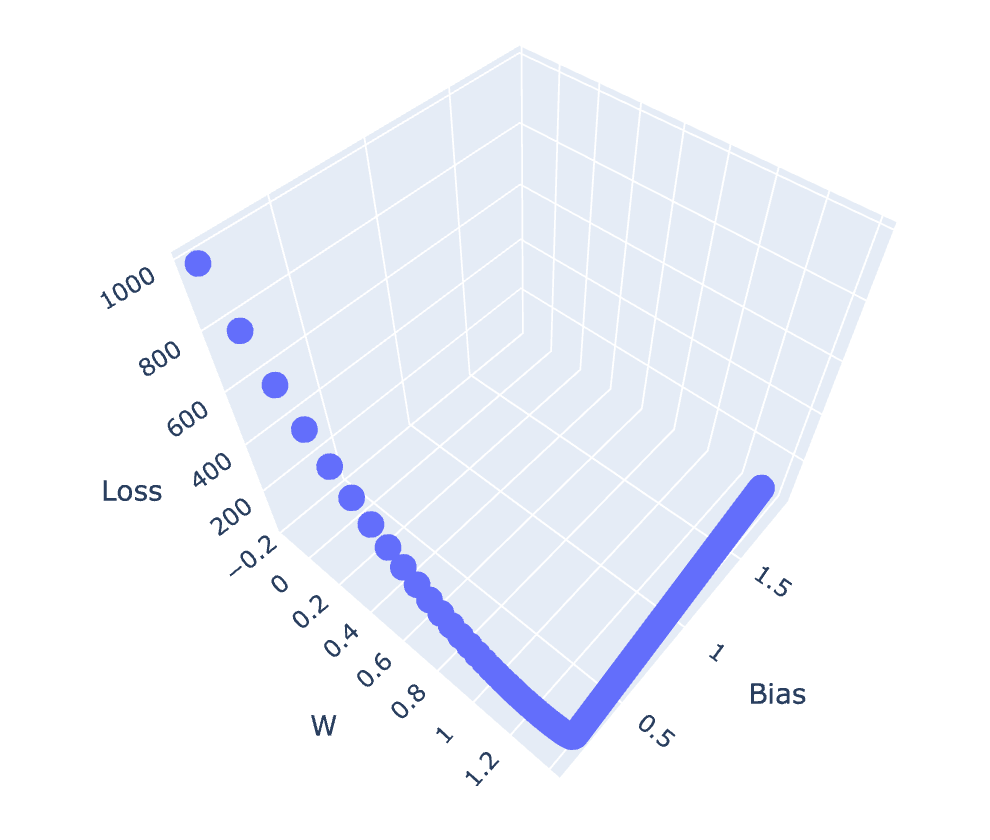

ซึ่งการเลือกใช้ Loss Function ได้อย่างเหมาะสมกับปัญหา รวมทั้งการคอนฟิก Output Layer ของ Model ที่เหมาะสมกับ Loss Function ที่เลือก เป็นสิ่งสำคัญอย่างยิ่งในการ Train Deep Learning Model

ผมจะขอแบ่งบทความออกเป็น 2 ตอน เพื่อให้ผู้อ่านได้ทำ Workshop ที่มีการคอนฟิก Model แบบ Regression, Autoencoder และ Classification ด้วย Loss Function 6 ตัว ได้แก่

Mean Squared Error Loss
Mean Squared Logarithmic Error Loss
Mean Absolute Error Loss
Binary Crossentropy Loss (ตอนต่อไป)
Categorical Crossentropy Loss (ตอนต่อไป)
Sparse Categorical Crossentropy Loss (ตอนต่อไป)ซึ่งการเลือกใช้ Loss Function ได้อย่างเหมาะสมกับปัญหา รวมทั้งการคอนฟิก Output Layer ของ Model ที่เหมาะสมกับ Loss Function ที่เลือก เป็นสิ่งสำคัญอย่างยิ่งในการ Train Deep Learning Model

ผมจะขอแบ่งบทความออกเป็น 2 ตอน เพื่อให้ผู้อ่านได้ทำ Workshop ที่มีการคอนฟิก Model แบบ Regression, Autoencoder และ Classification ด้วย Loss Function 6 ตัว ได้แก่

Mean Squared Error Loss

Mean Squared Logarithmic Error Loss

Mean Absolute Error Loss

Binary Crossentropy Loss (ตอนต่อไป)

Categorical Crossentropy Loss (ตอนต่อไป)

Sparse Categorical Crossentropy Loss (ตอนต่อไป)

#Regression Loss Functions

Model แบบ Regression จะทำนายค่าโดยมีผลลัพธ์เป็นเลขจำนวนจริง ซึ่งในบทความนี้ เราจะทดลอง Train Regression Model โดยใช้ Loss Function 2 แบบ ได้แก่ 1) Mean Squared Error Loss และ 2) Mean Squared Logarithmic Error Loss โดย Loss Function ทั้ง 2 ตัว จะมีความเหมาะสมกับการแก้ปัญหาของ Model แตกต่างกัน

## Mean Squared Error Loss

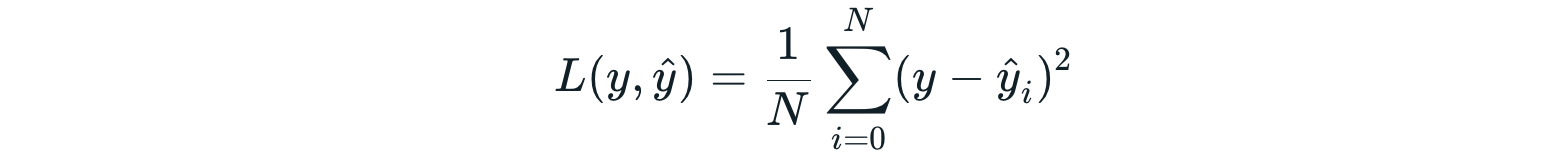

Mean Squared Error Loss เป็นตัวเลือกแรกในการแก้ปัญหาแบบ Regression ครับ โดย Mean Squared Error (MSE) คือ ค่าเฉลี่ยของผลต่างยกกำลังสอง ((y - ŷ)^2) ระหว่างค่าที่เป็นเลขจำนวนจริงที่เป็นผลเฉลย (y) กับค่าที่เกิดจากการทำนายของ Model (ŷ) ซึ่ง MSE จะไม่ติดลบ และจะมีค่าน้อยที่สุด คือ 0.0 เพราะผลต่างยกกำลังสองตามสมการด้านบน นอกจากนี้การยกกำลังสองของ MSE ยังจะทำให้ความผิดพลาดที่มีขนาดใหญ่มีผลต่อ Error ได้มากกว่าความผิดพลาดที่มีขนาดเล็ก หรือกล่าวได้อีกอย่างหนึ่งว่า Model ที่ใช้ Mean Squared Error Loss จะถูกลงโทษอย่างหนักเมื่อมันทำความผิดร้ายแรง

##Example

เราจะทดลอง Train Model แบบ Regression จากข้อมูลที่ Make ขึ้นมาด้วยฟังก์ชัน make_regression ของ Library Sklearn ตามขั้นตอนต่อไปนี้

Import Library ที่จำเป็นต้องใช้ในการทดลอง

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

import pandas as pd

import plotly.express as px
import plotly
import plotly.graph_objs as go

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

สร้าง Dataset แบบ Regression ที่มี Input Feature เท่ากับ 10 (มิติ) จำนวน 3,000 Record ด้วยฟังก์ชัน make_regression

In [ ]:
x, y = make_regression(n_samples=3000, n_features=10, noise=0.2, random_state=1)

x.shape, y.shape

ทำ Scaling Data แบบ Standardization (เนื่องจากเรารู้ว่าฟังก์ชัน make_regression จะ make Dataset แบบ Normal Distribution) เพื่อทำให้ Mean ของ Dataset เท่ากับ 0 และ Standard Deviation เท่ากับ 1

In [ ]:
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

โดยปกติ Model จะมีประสิทธิภาพยิ่งขึ้นเมื่อมีการทำ Scaling กับ Input Data และ Output Data

แบ่งข้อมูลสำหรับ Train และ Test โดยการสุ่มในสัดส่วน 50:50

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle= True)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

นำ Dataset ส่วนที่ Train มาแปลงเป็น DataFrame แล้วนำไป Plot โดยก่อนแปลง เราจะลดมิติของ Input Data ให้เหลือ 1 มิติ จากเดิม 10 มิติ ด้วยฟังก์ชัน TSNE ของ sklearn Library เพื่อทำให้เราแสดงภาพข้อมูลได้แบบ 2 มิติ

In [ ]:
x_embedded = TSNE(n_components=1, random_state=99, verbose=1, perplexity=40, n_iter=5000).fit_transform(x_train)

x_embedded.shape

In [ ]:
x_train_pd = pd.DataFrame(x_embedded, columns=['x'])
y_train_pd = pd.DataFrame(y_train, columns=['y'])

In [ ]:
df = pd.concat([x_train_pd, y_train_pd], axis=1)

In [ ]:
fig = px.scatter(df, x='x', y='y')
fig.show()

นิยาม Model โดยกำหนด Activate Function ที่ Output Layer เป็นแบบ Linear ซึ่งจะทำให้ไม่มีการเปลี่ยนแปลงค่าใดๆ ก่อนจะนำออกจาก Output Layer ของ Model

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(20, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

Compile Model โดยกำหนด Loss Function เป็น Mean Squared Error

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

Train Model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, verbose=1)

Plot Loss

In [ ]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

Evaluate Model

In [ ]:
train_mse = model.evaluate(x_train, y_train, verbose=0)
val_mse = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.5f, Validation: %.5f' % (train_mse, val_mse))

##Mean Squared Logarithmic Error Loss

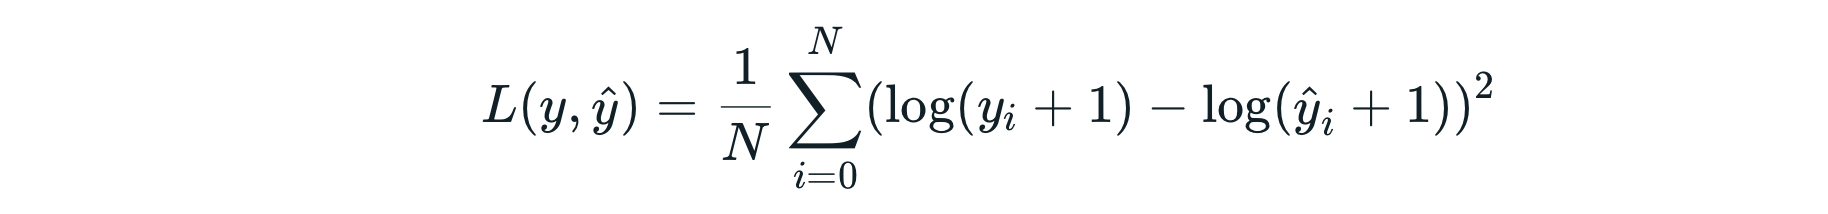

Mean Squared Logarithmic Error (MSLE) เป็นค่าที่แสดงถึงความแตกต่างสัมพัทธ์ (Relative Difference) ระหว่างผลเฉลยกับค่าที่เกิดจากการทำนายของ Model เช่น ถ้าเรามีค่าที่ต่างกัน 2 คู่ ได้แก่ 10 กับ 20 และ 1,000 กับ 2,000 ทั้ง 2 คู่จะมีความต่างกัน 2 เท่า Error แบบ MSLE จะให้ค่าที่ไม่แตกต่างกันมาก

ซึ่งหมายความว่า MSLE จะให้ความสำคัญกับความผิดพลาดทั้ง 2 แบบนี้ใกล้เคียงกัน เพราะมันมีสัดส่วนหรือเปอร์เซ็นต์ความต่างเท่ากัน ดังนั้น Model ที่ใช้ Mean Squared Logarithmic Error Loss จะไม่ถูกลงโทษอย่างหนักเมื่อมันทำความผิดร้ายแรงเหมือนกับ Model ที่ใช้ Mean Squared Error Loss

นอกจากนี้ Mean Squared Logarithmic Error Loss ยังลงโทษ Model ที่ให้ค่าในการทำนายน้อยกว่าค่าจริง (Underestimate) มากกว่าเมื่อ Model ให้ค่าในการทำนายมากกว่าค่าจริง (Overestimate) ดังตัวอย่างด้านล่าง

Example
Mean Squared Logarithmic Error Loss สามารถทำงานได้ดีกว่า Mean Squared Error Loss กับ Dataset อย่างเช่น Boston Housing ที่มีผลเฉลย หรือ Target เป็นมูลค่าราคากลางของบ้าน (MEDV: Median value of owner-occupied homes in $1000s) ซึ่งราคาจะขึ้นอยู่กับจำนวนห้องเฉลี่ยต่อหลังคาเรือน (RM: Average number of rooms per dwelling) และสัดส่วนของประชากรที่มีสถานะทางการศึกษาและเศรษฐกิจที่ต่ำกว่าค่าเฉลี่ย (LSTAT: Percentage of lower status of the population) นอกจากนี้ Mean Squared Logarithmic Error Loss ยังจะทำงานได้ดีกว่า Mean Squared Error Loss เมื่อเรานำมันมาใช้กับ Dataset ที่ไม่มีการทำ Scaling โดยผมจะขอยกตัวอย่างการ Train Model ด้วย Mean Squared Logarithmic Error Loss ดังต่อไปนี้

Load Boston Housing Dataset

In [ ]:
boston_dataset = load_boston()

boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Dataset ที่ Load มาประกอบด้วยข้อมูลดังนี้

data: ข้อมูลที่เกี่ยวข้องกับบ้านในแต่ละโซน
target: ราคากลางของบ้าน (คูณ 1000 ดอลลาร์)
feature_names: ชื่อของ Feature
DESCR: คำอธิบาย Dataset
filename : Path ของ File ที่ Download มา

แปลง data เป็น DataFrame

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston.head()

เพิ่ม PRICE ลงในอีก Column ของ DataFrame

In [ ]:
boston['PRICE'] = boston_dataset.target

boston.head()

Plot Histogram ของ PRICE

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.histplot(boston['PRICE'], bins=30, kde=True)
plt.show()

Plot Correlation Matrix

In [ ]:
correlation_matrix = boston.corr().round(3)

sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('correlation_matrix.jpeg', dpi=300)

Correlation Matrix แสดงค่า Correlation Coefficient ซึ่งมีช่วงข้อมูลตั้งแต่ -1 ถึง 1 ที่แสดงความสัมพันธ์ของ Feature แบบ Linear Relationship โดยค่าเข้าใกล้ 1 หรือ -1 แสดงว่า Feature 2 ตัวมีความสัมพันธ์ที่เข้มแข็งในแบบ Positive Correlation หรือแบบ Negative Correlation ตามลำดับ

จาก Correlation Matrix เราจะเลือก RM และ LSTAT ซึ่งเป็น 2 Feature ที่มีความสัมพันธ์กับ PRICE มากที่สุด คือ มี Correlation Coefficient เท่ากับ 0.69 และ -0.74 เพื่อจะนำมาเป็น Input Data สำหรับการ Train Model

ใช้ Scatter Plot แสดงความสัมพันธ์ระหว่าง RM กับ PRICE และระหว่าง LSTAT กับ PRICE

In [ ]:
plt.figure(figsize=(25, 10))

features = ['RM', 'LSTAT']
target = boston['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

plt.savefig('scatter.jpeg', dpi=300)

สร้าง Input Data จาก Column LSTAT และ RM และผลเฉลยจาก Column PRICE

In [ ]:
x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['PRICE']

x.shape, y.shape

แบ่งข้อมูลสำหรับ Train และ Test โดยการสุ่มในสัดส่วน 80:20

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=5)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

นิยาม Model โดยกำหนด Activate Function ที่ Output Layer เป็นแบบ Linear ซึ่งจะทำให้ไม่มีการเปลี่ยนแปลงค่าใดๆ ก่อนจะนำออกจาก Output Layer ของ Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

Compile Model โดยกำหนด Loss Function เป็น Mean Squared Error เพื่อใช้ในการเปรียบเทียบกับ Mean Squared Logarithmic Error ในการ Train ครั้งต่อไป

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

Train Model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)

Plot Loss

In [ ]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

Evaluate Model

In [ ]:
train_mse = model.evaluate(x_train, y_train, verbose=0)
val_mse = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.5f, Validation: %.5f' % (train_mse, val_mse))

นิยาม Model โดยกำหนด Activate Function ที่ Output Layer เป็นแบบ Linear ซึ่งจะทำให้ไม่มีการเปลี่ยนแปลงค่าใดๆ ก่อนจะนำออกจาก Output Layer ของ Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

Compile Model โดยกำหนด Loss Function เป็น Mean Squared Logarithmic Error

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

Train Model


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)